<a href="https://colab.research.google.com/github/louzeiro/trabalhosUSP/blob/main/tarefa_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gestão da Qualidade**
** **
Flaviane Louzeiro da Silva, N° USP: 11885075 <br>
Lucas Roberto de O. Lopes, N° : USP: 10850460

Tarefa: 
**Questionário 6 e 7**

**Entrega até 02/12 às 18h.**
** **

**Descrição**: Crie um exemplo hipotético de gestão da qualidade, estabelecendo qual a característica da qualidade em estudo. Supondo que a característica tem distribuição Normal com uma certa média e um certo desvio-padrão, gere 30 amostras de tamanho 5. Em seguida, gere mais 10 amostras de tamanho 5 supondo outros parâmetros para a distribuição da característica da qualidade.  Construa gráficos de controle $\overline{X} - R$ e gráficos da soma cumulativa, CUSUM tabular ou máscara V. Verifique as diferenças na detecção de anomalias no processo para as técnicas consideradas. Estabeleça os limites de especificação e avalie a capacidade do processo.

Você pode utilizar R ou Python, e deve submeter os códigos e um arquivo .pdf ou .html com os resultados comentados, além do arquivo de dados gerados em .csv.



In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
sns.set_theme(style="whitegrid")

%matplotlib inline

**Descrição os dados.**

Em consequência da pandemia de Covid-19, o refeitório da USP/São Carlos-SP, passou a servir as refeições em marmitas. Porém, nos últimos 2 meses, os frequentadores começaram a reclamar da variabilidade do peso das marmitas. Então com o intuito de analisar o processo, foi solicitado para um grupo de estudantes do curso de Estatística um estudo sobre o caso.

Esses estudantes visitaram a área de manipulação e montagem das marmita e conversaram com a nutricionista responsável que definiu que o peso médio de cada marmita deve ser de 500 g e, sabendo que há variabilidade no processo de montagem das marmitas, definiu também o Limite Inferior de Especificação em 450 g e o Limite Superior de Especificação em 550 g. Por fim, os estudantes solicitaram que fossem coletadas 5 amostras por 40 dias, para confeccionar um banco de dados que permitisse uma análise estatística do processo.

Então nos 30 primeiros dias foram coletadas as amostras abaixo:


*Amostras geradas de uma distribuição Normal ($\mu$=500, $\sigma^2$=50)*

In [ ]:
np.random.seed(61)
media = 500           #
desvioP = 50
n = 30

amostras = []
for observacao in range(n):
  amostrinhas = np.random.normal(media, desvioP, 5)
  amostras.append(amostrinhas)

Contudo, devido ao encerramento da licitação, outra empresa passou a prestar serviços ao bandejão. Essa empresa recebeu as recomendações da nutricionista quanto as especificações do processo de montagem das marmitas. A análise do processo continuou sendo desenvolvida e foram coletadas as amostras dos últimos 10 dias.

*Amostras geradas de uma distribuição Normal ($\mu$=530, $\sigma^2$ = 25)*

In [ ]:
np.random.seed(61)
media = 530  
desvioP = 25 
n = 10 

for observacao in range(n):
  amostrinhas = np.random.normal(media, desvioP, 5)
  amostras.append(amostrinhas) 

Por fim, foi construído o conjunto de dados com as amostras coletadas no período.


In [ ]:
df_amostras = pd.DataFrame(amostras, columns=['X1','X2','X3','X4','X5'])
df_amostras.to_csv('pesoMarmitas.csv', sep='\t', index=False)
df_amostras.head()

,X1,X2,X3,X4,X5
0,478.425222,521.968777,499.936909,553.056142,510.168239
1,533.278637,447.819239,435.804446,497.923305,442.601134
2,493.707852,551.007428,551.481035,496.633578,470.012589
3,512.008966,389.748354,471.738622,577.124693,534.058727
4,506.322774,430.986218,462.996646,478.593297,505.780380


Adicionando a média e a amplitude das amostras

In [ ]:
df_amostras['X_barra'] = df_amostras.mean(axis=1)
df_amostras['R'] = df_amostras.max(axis=1)-df_amostras.min(axis=1)
df_amostras.head()

,X1,X2,X3,X4,X5,X_barra,R
0,478.425222,521.968777,499.936909,553.056142,510.168239,512.711058,74.630920
1,533.278637,447.819239,435.804446,497.923305,442.601134,471.485352,97.474192
2,493.707852,551.007428,551.481035,496.633578,470.012589,512.568496,81.468446
3,512.008966,389.748354,471.738622,577.124693,534.058727,496.935872,187.376338
4,506.322774,430.986218,462.996646,478.593297,505.780380,476.935863,75.336556


**Capacidade do Processo**




In [ ]:
 import scipy.stats
 x_barra_barra = df_amostras['X_barra'].mean(axis=0)
 r_barra = df_amostras['R'].mean(axis=0)
 sigma = r_barra/2.326    # valor tabelado para n=5

 LSE = 550
 LIE = 450

Probabilidade da marmita estar fora dos limites de especificações

In [ ]:
prob_X_menor_LIE = round(scipy.stats.norm(x_barra_barra, sigma).cdf(LIE),5)
prob_X_maior_LSE = round(scipy.stats.norm(x_barra_barra, sigma).cdf(LSE),5)
processo = round(prob_X_menor_LIE + 1 - prob_X_maior_LSE, 5)
print("A probabilidade das marmitas estarem fora dos limites de especificação é de", processo)

A probabilidade das marmitas estarem fora dos limites de especificação é de 0.27237


Razão da capacidade do processo

In [ ]:
Cp = round((LSE-LIE)/(6*sigma),2)
print('A razão da capacidade do processo é', Cp)

A razão da capacidade do processo é 0.37


*Com* isso, observou-se que há muitas marmitas sendo produzidas foram dos limites de especificações.

**Gráficos de controle $\overline{X} −R  $**

Parâmetros 

In [ ]:
r_barra = df_amostras['R'].mean(axis=0)
x_barra_barra = df_amostras['X_barra'].mean(axis=0)

# valores tabelados para o tamanho da amostra 5
A2 = 0.577        
D4 = 2.114
D3 = 0

### limites de controle - X_barra
LSC_X_barra = x_barra_barra + A2*r_barra
LIC_X_barra = x_barra_barra - A2*r_barra

### limites de controle - R
LSC_R = D4*r_barra
LIC_R = D3*r_barra

[Text(0, 0.5, 'R'), Text(0.5, 0, 'Observação')]

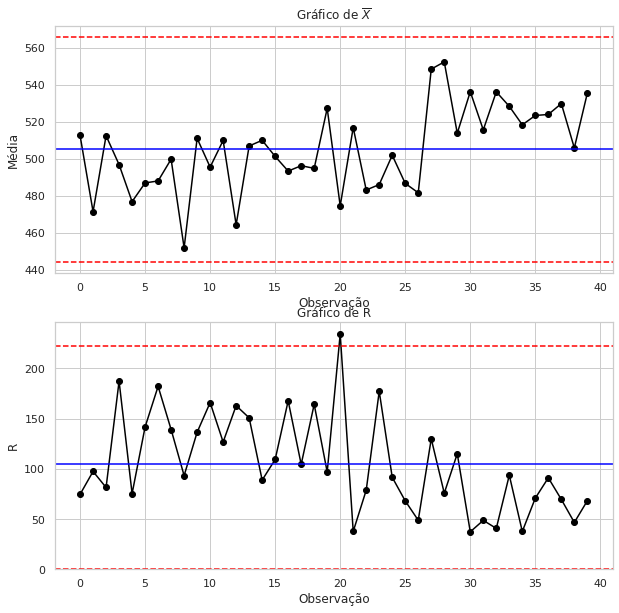

In [ ]:
# X_barra
fig, axs = plt.subplots(2, figsize=(10,10))
axs[0].plot(df_amostras['X_barra'], linestyle='-', marker='o', color='black')
axs[0].axhline(x_barra_barra, color='blue')
axs[0].axhline(LSC_X_barra, color='red', linestyle='dashed')
axs[0].axhline(LIC_X_barra, color='red', linestyle='dashed')
axs[0].set_title('Gráfico de $\overline{X}$')
axs[0].set(xlabel='Observação', ylabel='Média')

# R 
axs[1].plot(df_amostras['R'], linestyle='-', marker='o', color='black')
axs[1].axhline(r_barra, color='blue') 
axs[1].axhline(LSC_R, color='red', linestyle='dashed')
axs[1].axhline(LIC_R, color='red', linestyle='dashed')
axs[1].set_ylim(bottom=0)
axs[1].set_title('Gráfico de R')
axs[1].set(xlabel='Observação', ylabel='R')

No gráfico de $\overline{X}$ pode-se observar a variabilidade da média das amostras. Verifica-se que todas as médias ficaram dentro dos limites de controle, contudo a média das últimas amostras ficaram acima do limite central o que configura um padrão indesejável, pois são pontos em uma sequência sempre crescente.

No gráfico de R é possível observar a amplitude das amostras. Pode-se notar que apenas a observação 20 ficou acima do limite superior de controle. Outro resultado importante, é que as últimas observações estão abaixo do limite central da amplitude, indicando que diminuiu a amplitude das amostras dessas últimas observações.

**Gráficos da soma cumulativa, CUSUM tabular**

Gráfico CUSUM tabular utilizando a biblioteca pyspc

In [ ]:
!pip install pyspc

In [ ]:
df_amostras2 = df_amostras.drop(['X_barra','R'],axis = 1)

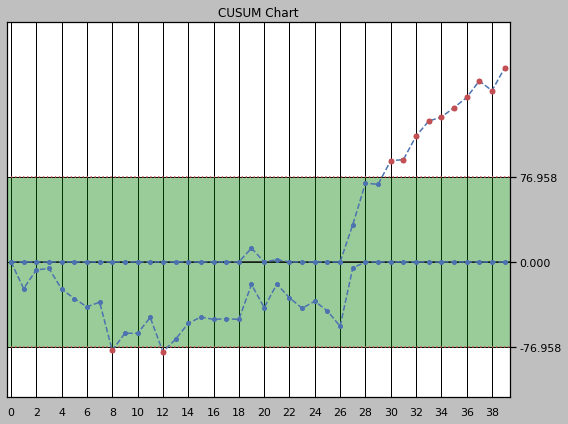

<pyspc: (8768131575761)>


In [ ]:
from pyspc import *
plt.rcParams["figure.figsize"] = (8,6)
a = spc(df_amostras2) + cusum() + rules()
print(a)

No gráfico de CUSUM tabular é possivel verificar algumas anomalias logo nas observações 8 e 12, onde esses pontos saem fora dos limites de controle e após a observação 31 todas as observações posteriores saem fora dos limites de controle. Portanto, isso nos permite verificar que com esse gráfico é possivel detectar de forma bem mais rapida que o gráfico de $\overline{X}$ e R que o processo não está controlado.